# Project 2:  Holiday weather - South Africa

by Rob Griffiths, 11 September 2015, updated 11 April 2017, 18 October and 20 December 2017
and Rita N, 20 November 2018

This is the project notebook for the second part of The Open University's _Learn to code for Data Analysis_ course.

There is nothing I like better than taking a holiday. In the winter I like to have a two week break in a country where I can be guaranteed sunny dry days. In the summer I like to have two weeks off relaxing in my garden in London. However I'm often disappointed because I pick a fortnight when the weather is dull and it rains. So in this project I am going to use the historic weather data from the Weather Underground for London to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2016 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

In the 2018 update of this project, I have amended the analysis to determine a promising 2-week period for a vacation in the capital of South Africa.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'London_2014.csv' file.

The data for South Africa is available as part of the project, and coding is updated accordingly to call the South African weather data 'CapeTown_CPT_2014.csv'

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [32]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
capeTown = read_csv('CapeTown_CPT_2014.csv', skipinitialspace=True)

Now I want to see the structure of the data before starting to clean it.

In [33]:
capeTown.head()

Date 
 Max TemperatureC 
 Mean TemperatureC 
 Min TemperatureC 
 Dew PointC 
 MeanDew PointC 
 Min DewpointC 
 Max Humidity 
 Mean Humidity 
 Min Humidity 
 ... 
 Max VisibilityKm 
 Mean VisibilityKm 
 Min VisibilitykM 
 Max Wind SpeedKm/h 
 Mean Wind SpeedKm/h 
 Max Gust SpeedKm/h 
 Precipitationmm 
 CloudCover 
 Events 
 WindDirDegrees<br /> 
 
 
 
 
 0 
 2014-1-1 
 28 
 23 
 18 
 19 
 17 
 15 
 88 
 71 
 45 
 ... 
 19.0 
 14.0 
 10.0 
 35 
 14 
 NaN 
 0.0 
 2.0 
 NaN 
 213<br /> 
 
 
 1 
 2014-1-2 
 28 
 23 
 18 
 19 
 18 
 16 
 88 
 74 
 46 
 ... 
 26.0 
 13.0 
 10.0 
 32 
 21 
 NaN 
 0.0 
 2.0 
 NaN 
 204<br /> 
 
 
 2 
 2014-1-3 
 27 
 23 
 19 
 19 
 18 
 18 
 94 
 75 
 48 
 ... 
 31.0 
 12.0 
 3.0 
 32 
 26 
 NaN 
 0.0 
 4.0 
 NaN 
 193<br /> 
 
 
 3 
 2014-1-4 
 27 
 22 
 18 
 19 
 18 
 14 
 88 
 74 
 46 
 ... 
 26.0 
 13.0 
 9.0 
 32 
 18 
 NaN 
 0.0 
 3.0 
 NaN 
 314<br /> 
 
 
 4 
 2014-1-5 
 26 
 22 
 18 
 17 
 16 
 14 
 83 
 70 
 46 
 ... 
 26.0 
 13.0 
 10.0 
 45 
 21 
 NaN 
 0.0 
 4.0 
 Rain 
 25<br /> 
 
 
 
 5 rows × 23 columns

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [34]:
capeTown = capeTown.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [35]:
capeTown['WindDirDegrees'] = capeTown['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [36]:
capeTown['WindDirDegrees'] = capeTown['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'Date'` column into values of the `datetime64`  date type.

In [37]:
capeTown['Date'] = to_datetime(capeTown['Date'])

We also need to change the index from the default to the `datetime64` values in the `'Date'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [38]:
capeTown.index = capeTown['Date']

In [39]:
capeTown.head()

Date 
 Max TemperatureC 
 Mean TemperatureC 
 Min TemperatureC 
 Dew PointC 
 MeanDew PointC 
 Min DewpointC 
 Max Humidity 
 Mean Humidity 
 Min Humidity 
 ... 
 Max VisibilityKm 
 Mean VisibilityKm 
 Min VisibilitykM 
 Max Wind SpeedKm/h 
 Mean Wind SpeedKm/h 
 Max Gust SpeedKm/h 
 Precipitationmm 
 CloudCover 
 Events 
 WindDirDegrees 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2014-01-01 
 2014-01-01 
 28 
 23 
 18 
 19 
 17 
 15 
 88 
 71 
 45 
 ... 
 19.0 
 14.0 
 10.0 
 35 
 14 
 NaN 
 0.0 
 2.0 
 NaN 
 213.0 
 
 
 2014-01-02 
 2014-01-02 
 28 
 23 
 18 
 19 
 18 
 16 
 88 
 74 
 46 
 ... 
 26.0 
 13.0 
 10.0 
 32 
 21 
 NaN 
 0.0 
 2.0 
 NaN 
 204.0 
 
 
 2014-01-03 
 2014-01-03 
 27 
 23 
 19 
 19 
 18 
 18 
 94 
 75 
 48 
 ... 
 31.0 
 12.0 
 3.0 
 32 
 26 
 NaN 
 0.0 
 4.0 
 NaN 
 193.0 
 
 
 2014-01-04 
 2014-01-04 
 27 
 22 
 18 
 19 
 18 
 14 
 88 
 74 
 46 
 ... 
 26.0 
 13.0 
 9.0 
 32 
 18 
 NaN 
 0.0 
 3.0 
 NaN 
 314.0 
 
 
 2014-01-05 
 2014-01-05 
 26 
 22 
 18 
 17 
 16 
 14 
 83 
 70 
 46 
 ... 
 26.0 
 13.0 
 10.0 
 45 
 21 
 NaN 
 0.0 
 4.0 
 Rain 
 25.0 
 
 
 
 5 rows × 23 columns

## Finding a holiday break

I am not greatly familiar with the weather trends in the southern hemisphere, hence I will start my evaluation by plotting the average temperature across the year in Cape Town to narrow down on a promising period for a holiday.

I start by telling Jupyter to display any graph created inside this notebook:

In [40]:
%matplotlib inline

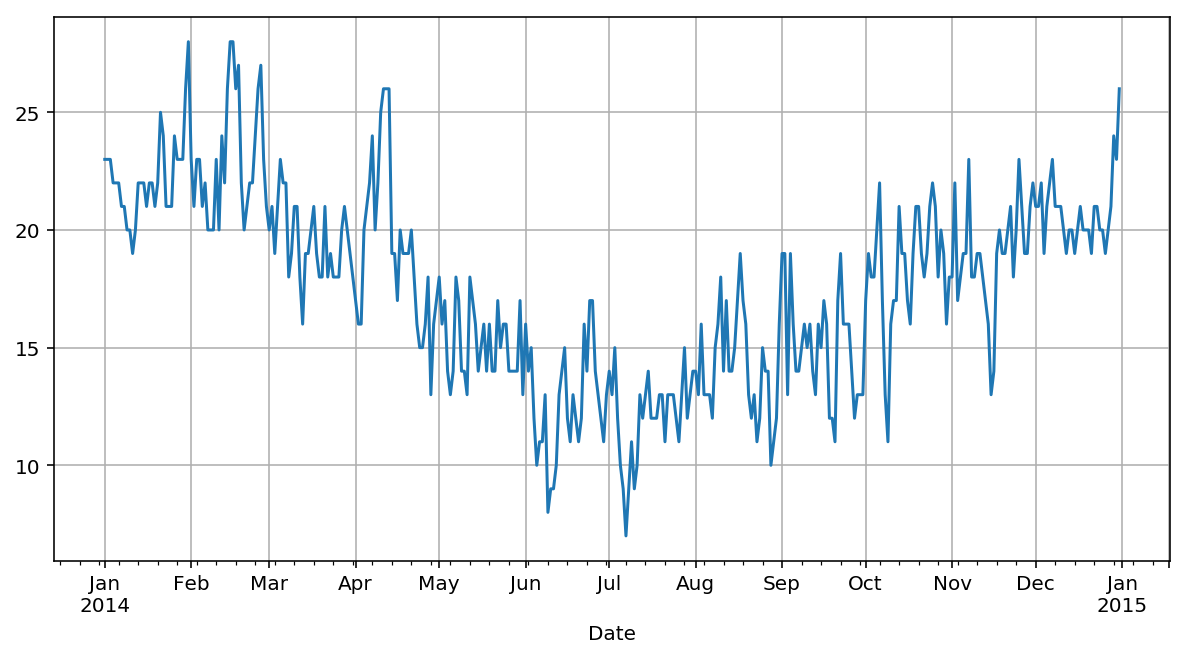

In [41]:
capeTown['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

It looks like the months January, February and March are the warmest. Let's find out if they are also dry by plotting 'Percipitationmm'

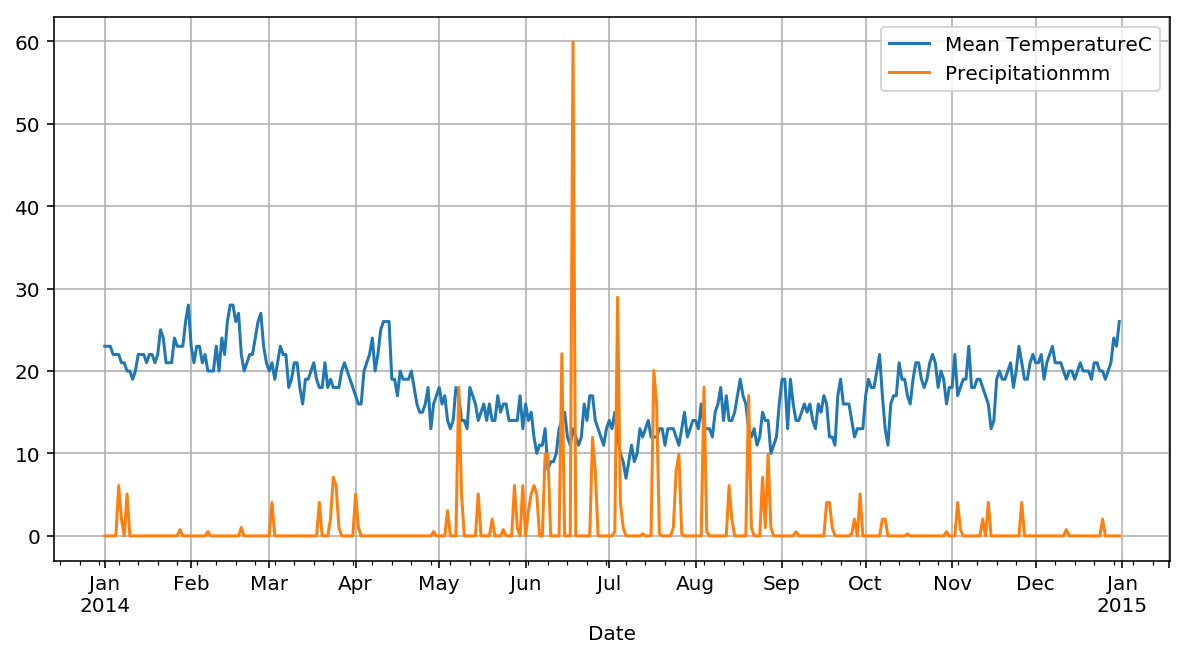

In [42]:
capeTown[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, the precipitation is lowest from January through April and from September to December. I definitely can see that the months May through August would be rainy and cool in Cape Town.

I would like to focus on January and February as promising travel months, warm and dry. Within these months, I will look for a 2 week travel window that is most promising.

First I will create a subset dataframe for these dates.

In [43]:
janfeb = capeTown.loc[datetime(2014,1,1) : datetime(2014,2,28)]

I want to know if these months are sunny, hence I will plot the CloudCover

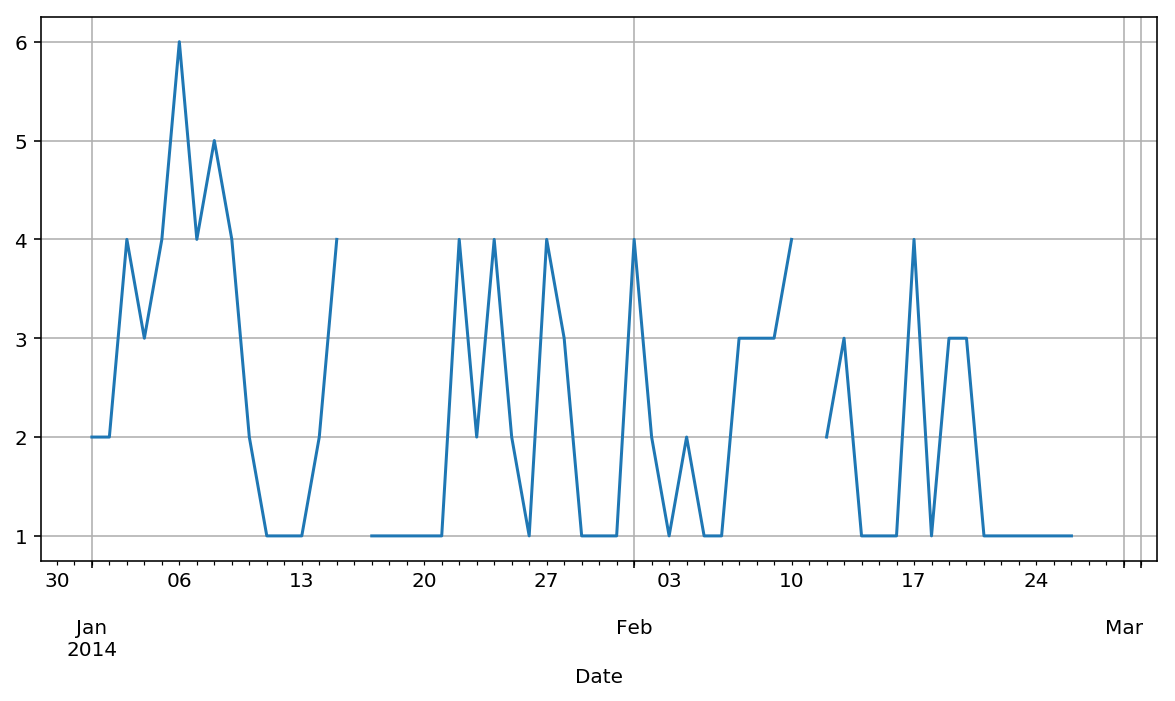

In [44]:
janfeb['CloudCover'].plot(grid=True, figsize=(10,5))

The data is a bit patchy on cloud cover, but it would look like the sunniest period in 2014 was from mid January to end of February.

I will add my other key metrics, mean temperature and precipitation to the graph.

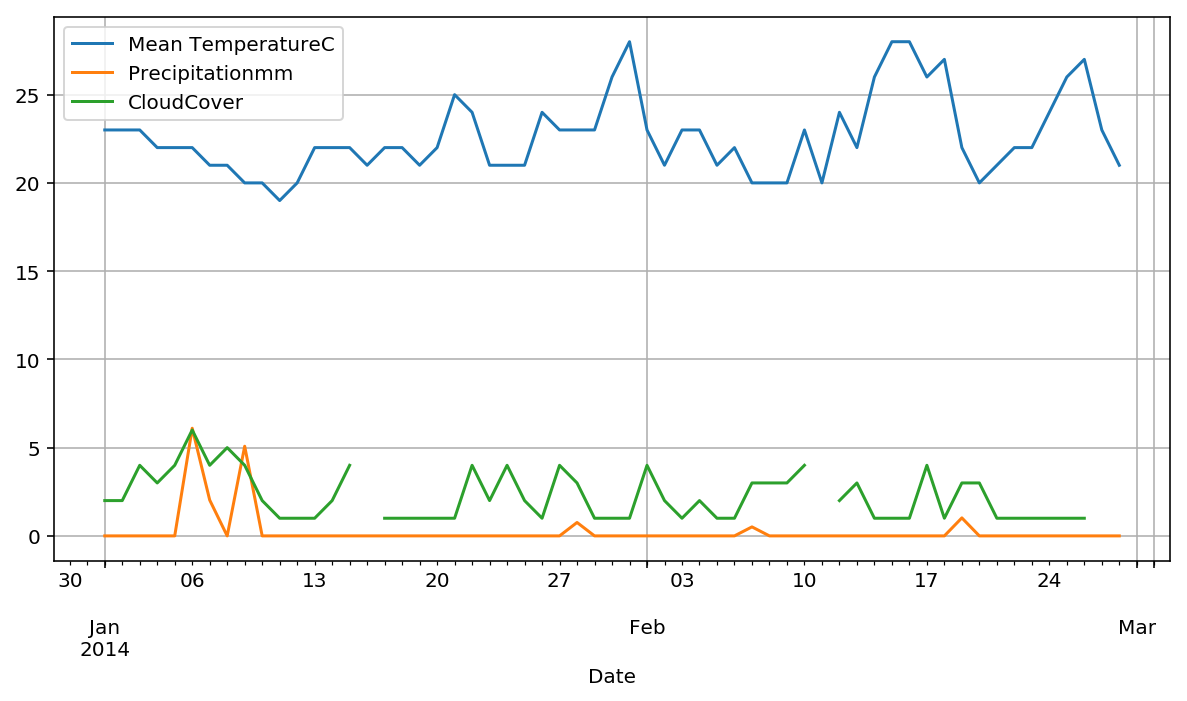

In [45]:
janfeb[['Mean TemperatureC', 'Precipitationmm', 'CloudCover']].plot(grid=True, figsize=(10,5))

The zoomed in view show me that the last 2 weeks of February had the best combination of warm average temperatures, sun and low amounts of rain.

## Conclusions

The graphs have shown the variation in temperature, rain and cloud cover throughout the year in Cape Town. Choosing a dry time to travel seems essential, even better if it is warm. My choice would be to travel to Cape Town during the last 2 weeks of February. Of course the analysis is done on 2014 observerd weather, and there is no guarantee that the observed weather will repeat itself in future years.